# Tugas Pemrograman Proyek 2B
## MATH1042: Peluang dan Statistika
### Kelompok 2

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import random

In [19]:
data_raw = pd.read_csv("income.csv")
nasabah_id = list(range(1, len(data_raw) + 1))
data_raw["ID Nasabah"] = nasabah_id
data = data_raw[["ID Nasabah", "Income", "Car price"]]

data.head()

,ID Nasabah,Income,Car price
0,1,72.0,37.0
1,2,153.0,76.0
2,3,28.0,13.9
3,4,26.0,13.0
4,5,23.0,11.3


In [20]:
# Income
income = data["Income"]
income_mean = income.mean()
income_std = income.std()
print(f"Income mean: {income_mean}")
print(f"Income std: {income_std}")

Income mean: 69.88703125
Income std: 77.99393243336522


In [21]:
# Car Price
car_price = data["Car price"]
car_price_mean = car_price.mean()
car_price_std = car_price.std()
print(f"Car price mean: {car_price_mean}")
print(f"Car price std: {car_price_std}")

Car price mean: 30.283625
Car price std: 21.998228003691366


Text(0, 0.5, 'Frequency')

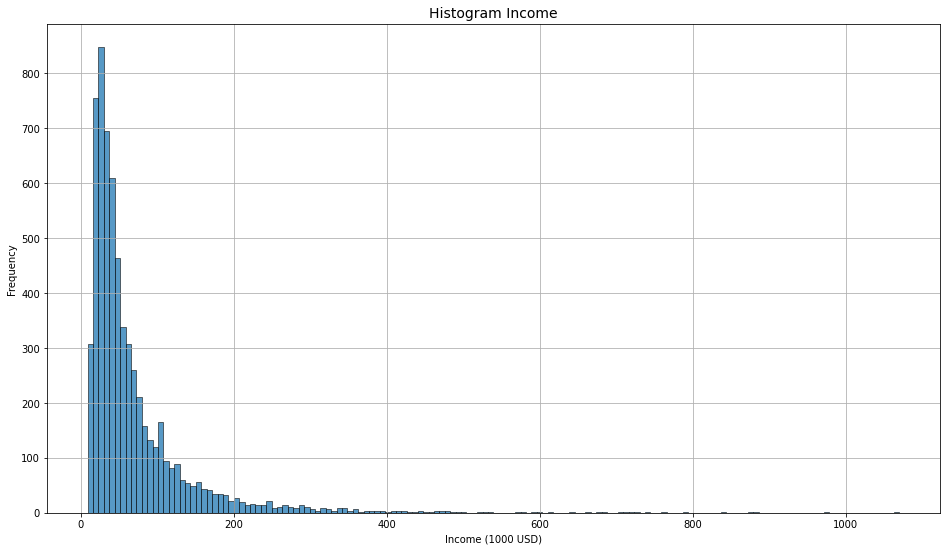

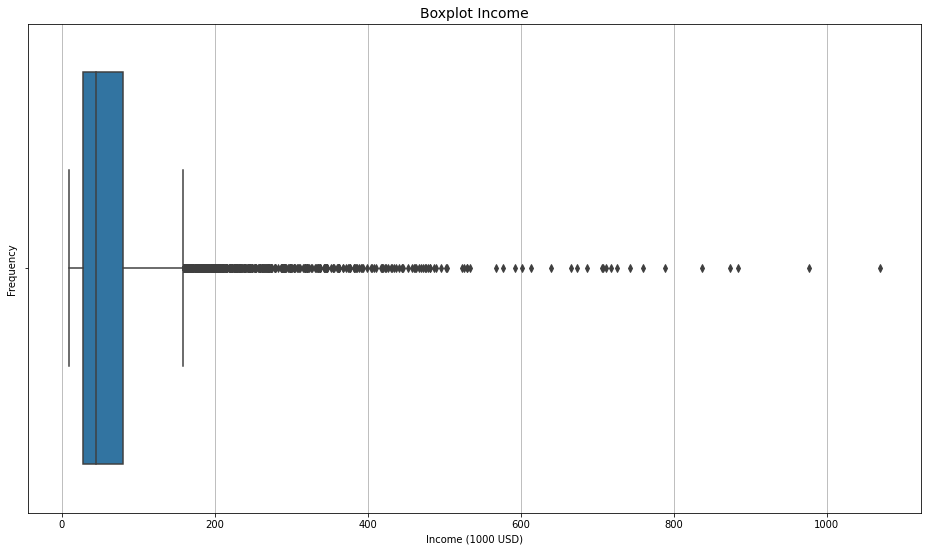

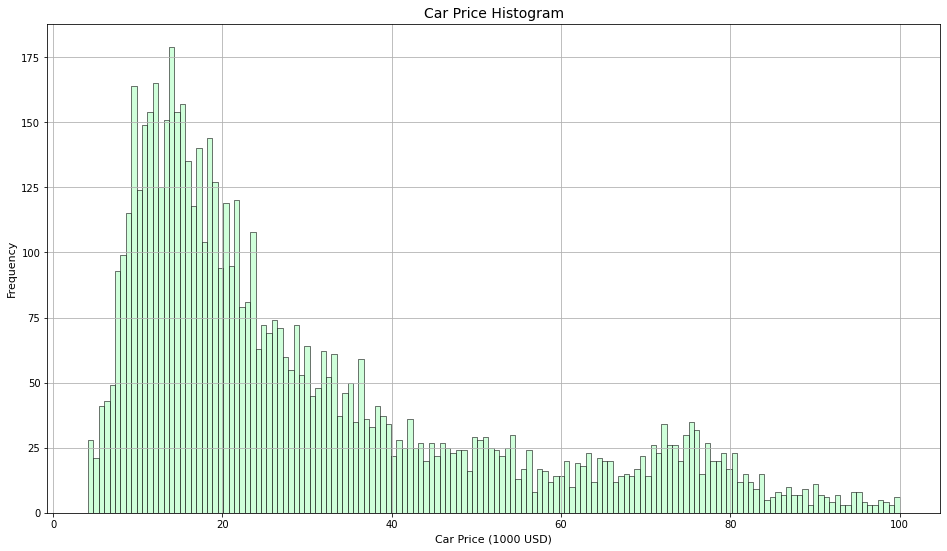

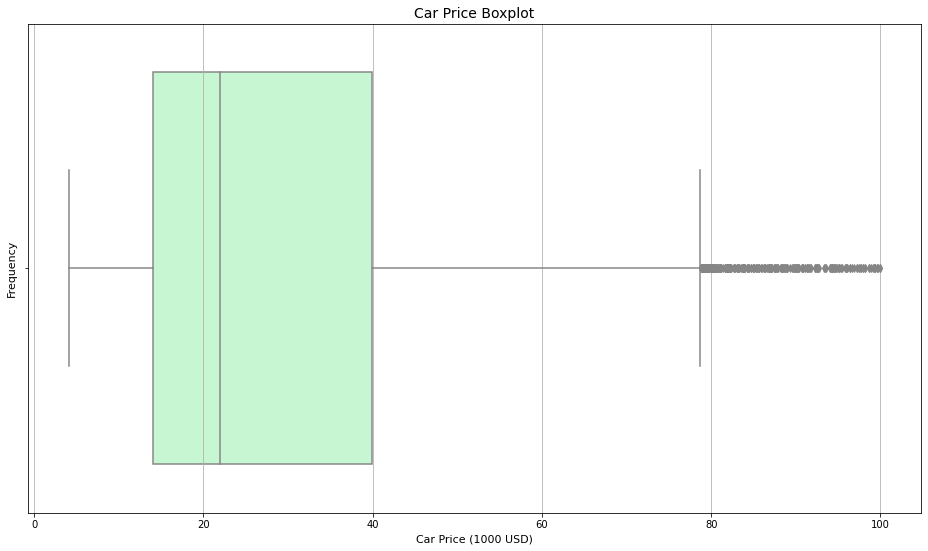

In [22]:
#Modeling Histogram
fig, ax = plt.subplots(figsize=(16, 9))
plt.grid()
plt.title('Histogram Income', size = 14)
sns.histplot(income, ax=ax, bins=150)
plt.xlabel("Income (1000 USD)")
plt.ylabel("Frequency")

#Modeling Box Plot
fig, ax = plt.subplots(figsize=(16, 9))
plt.title('Boxplot Income', size = 14)
plt.grid()
sns.boxplot(x=income, ax=ax)
plt.xlabel("Income (1000 USD)")
plt.ylabel("Frequency")

#Modeling Histogram
fig, ax = plt.subplots(figsize=(16, 9))
plt.grid()
plt.title('Car Price Histogram', size = 14)
sns.histplot(car_price, ax=ax, bins=150, color="#bfffce")
plt.xlabel("Car Price (1000 USD)", fontsize=11)
plt.ylabel("Frequency",fontsize=11)

#Modeling Box Plot
fig, ax = plt.subplots(figsize=(16, 9))
plt.title('Car Price Boxplot', size = 14)
plt.grid()
sns.boxplot(x=car_price, ax=ax, color="#bfffce")
plt.xlabel("Car Price (1000 USD)", fontsize=11)
plt.ylabel("Frequency",fontsize=11)

In [33]:
sorted_income = sorted(income)
income_size = len(income)
mean_sample = 50
samples = 160
mean_list = []
n = 0
for i in range(samples):
    for j in range(mean_sample):
        n += sorted_income[random.randint(0, income_size - 1)]
    current_mean = n / mean_sample
    mean_list.append(current_mean)
    n = 0
income_mean_mean = np.mean(mean_list)
income_mean_std = np.std(mean_list)
print(income_mean_mean)
print(income_mean_std)

71.54437499999999
11.578086558640639


In [34]:
z = 1.645
print(z * (income_std/(np.sqrt(samples))))
s = income_mean - z * (income_std/(np.sqrt(samples)))
round(s, 2)

10.143007085441564


59.74

<AxesSubplot:title={'center':'Distribusi Rata-Rata Income\n160 sampel dengan 50 pengambilan data acak tiap sampel'}, xlabel='Rata-rata income (x1000 USD)', ylabel='Frekuensi rata-rata income'>

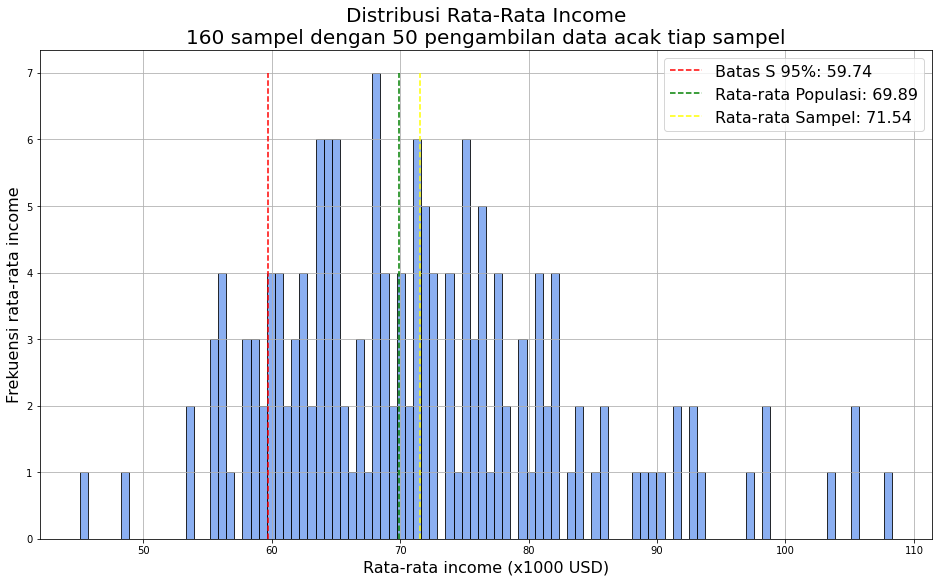

In [36]:
plt.figure(figsize=(16, 9))
plt.grid()
plt.title(f"Distribusi Rata-Rata Income\n{samples} sampel dengan {mean_sample} pengambilan data acak tiap sampel", fontsize=20)
plt.xlabel("Rata-rata income (x1000 USD)", fontsize=16)
plt.ylabel("Frekuensi rata-rata income", fontsize=16)
plt.vlines(x=s, ymin=0, ymax=7, color="red", label=f"Batas S 95%: {round(s, 2)}", linestyles="dashed")
plt.vlines(x=income_mean, ymin=0, ymax=7, color="green", label=f"Rata-rata Populasi: {round(income_mean, 2)}", linestyles="dashed")
plt.vlines(x=income_mean_mean, ymin=0, ymax=7, color="yellow", label=f"Rata-rata Sampel: {round(income_mean_mean, 2)}", linestyles="dashed")
plt.legend(loc="upper right", fontsize=16)
sns.histplot(mean_list, bins=100, color="cornflowerblue")

In [12]:
n_nasabah = len(income)
n_nasabah_kaya = 0
list_nasabah_kaya = []
n_nasabah_promosi = 0
list_nasabah_promosi = []

In [13]:
for index, row in data.iterrows():
    if row["Income"] > 60:
        n_nasabah_kaya += 1
        list_nasabah_kaya.append([row["ID Nasabah"], 
                                  row["Income"], 
                                  row["Car price"]])
        if row["Car price"] > 15:
            n_nasabah_promosi += 1
            list_nasabah_promosi.append([row["ID Nasabah"], 
                                        row["Income"], 
                                        row["Car price"]])

In [15]:
print(f"{n_nasabah_kaya} nasabah prospektif dari {n_nasabah}")
print(f"{n_nasabah_kaya * 100 / n_nasabah} %")

2282 nasabah prospektif dari 6400
35.65625 %


In [16]:
print(n_nasabah_promosi)
print(n_nasabah)
persentase_nasabah_promosi = n_nasabah_promosi * 100 / n_nasabah
print(f"{persentase_nasabah_promosi} %")

2282
6400
35.65625 %


In [17]:
pop_kota = 1_200_000
pop_kota_promosi = pop_kota * persentase_nasabah_promosi / 100
print(pop_kota_promosi)

427875.0
